In [1]:
import tensorflow
from tensorflow import keras
from IPython.display import Image,display
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
!nvidia-smi

Wed Nov 10 21:42:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

This utility allows administrators to query GPU device state and with the appropriate privileges, permits administrators to modify GPU device state. 

In [3]:
!wget https://storage.googleapis.com/ibeans/train.zip

--2021-11-10 21:42:15--  https://storage.googleapis.com/ibeans/train.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.6.128, 142.250.159.128, 74.125.70.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.6.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143812152 (137M) [application/zip]
Saving to: ‘train.zip’

train.zip           100%[===================>] 137.15M   171MB/s    in 0.8s    

2021-11-10 21:42:16 (171 MB/s) - ‘train.zip’ saved [143812152/143812152]



In [4]:
!wget https://storage.googleapis.com/ibeans/validation.zip
!wget https://storage.googleapis.com/ibeans/test.zip

--2021-11-10 21:42:16--  https://storage.googleapis.com/ibeans/validation.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.196.128, 173.194.197.128, 64.233.191.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.196.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18504213 (18M) [application/zip]
Saving to: ‘validation.zip’

validation.zip      100%[===================>]  17.65M  --.-KB/s    in 0.1s    

2021-11-10 21:42:16 (135 MB/s) - ‘validation.zip’ saved [18504213/18504213]

--2021-11-10 21:42:16--  https://storage.googleapis.com/ibeans/test.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.6.128, 142.250.159.128, 74.125.70.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.6.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17708541 (17M) [application/zip]
Saving to: ‘test.zip’

test.zip            100%[===================>

In [5]:
mkdir beans

In [6]:
!ls

beans  sample_data  test.zip  train.zip  validation.zip


In [7]:
!unzip train.zip -d beans/
!unzip validation.zip -d beans/
!unzip test.zip -d beans/

Archive:  train.zip
   creating: beans/train/
   creating: beans/train/healthy/
   creating: beans/train/angular_leaf_spot/
   creating: beans/train/bean_rust/
  inflating: beans/train/healthy/healthy_train.265.jpg  
  inflating: beans/train/healthy/healthy_train.271.jpg  
  inflating: beans/train/healthy/healthy_train.259.jpg  
  inflating: beans/train/healthy/healthy_train.99.jpg  
  inflating: beans/train/healthy/healthy_train.311.jpg  
  inflating: beans/train/healthy/healthy_train.66.jpg  
  inflating: beans/train/healthy/healthy_train.72.jpg  
  inflating: beans/train/healthy/healthy_train.305.jpg  
  inflating: beans/train/healthy/healthy_train.339.jpg  
  inflating: beans/train/healthy/healthy_train.113.jpg  
  inflating: beans/train/healthy/healthy_train.107.jpg  
  inflating: beans/train/healthy/healthy_train.106.jpg  
  inflating: beans/train/healthy/healthy_train.112.jpg  
  inflating: beans/train/healthy/healthy_train.338.jpg  
  inflating: beans/train/healthy/healthy_trai

In [8]:
! ls beans

test  train  validation


In [9]:
ls beans/train

angular_leaf_spot/  bean_rust/  healthy/


There are three classes of image. One is healthy and other two are with specific observations(angular_leaf_spot/bean_rust)

In [10]:
!find beans -type f | wc -l #count of images

1296


In [11]:
!find beans/test -type f | wc -l

128


In [12]:
!find beans/validation -type f | wc -l

133


In [13]:
!find beans/train -type f | wc -l

1035


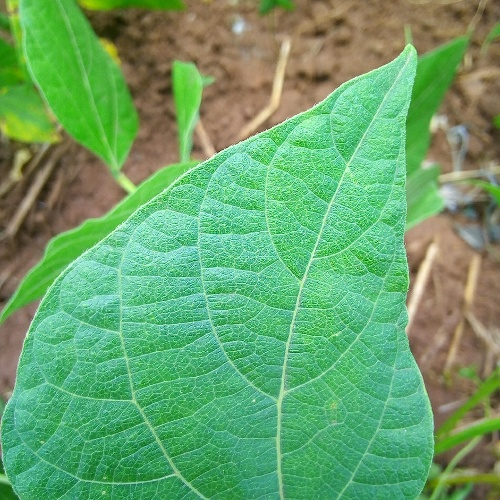

In [14]:
display(Image('/content/beans/train/healthy/healthy_train.0.jpg'))

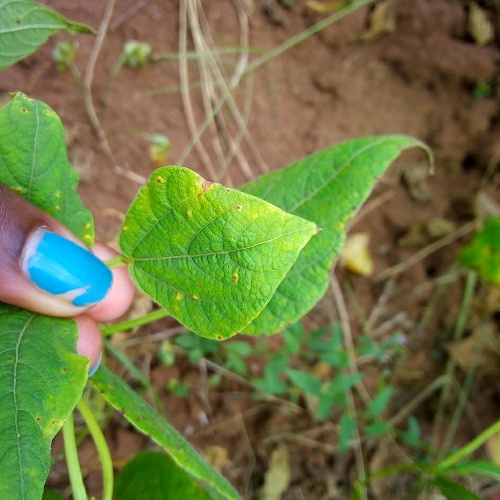

In [15]:
display(Image('/content/beans/train/bean_rust/bean_rust_train.0.jpg'))

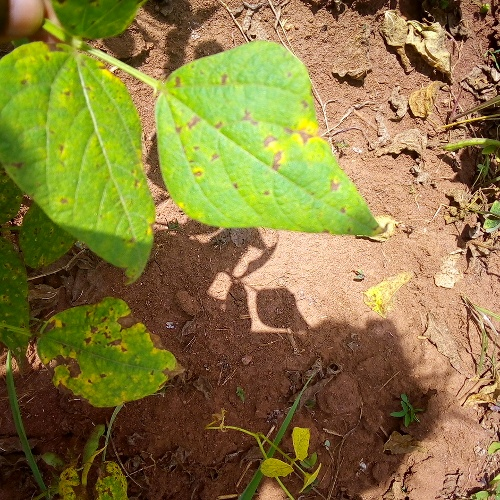

In [16]:
display(Image('/content/beans/train/angular_leaf_spot/angular_leaf_spot_train.0.jpg'))

In [17]:
batch_size = 128
image_width = 224
image_height = 224

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # train dataset
train = ImageDataGenerator()
train_ds = train.flow_from_directory(
              'beans/train',
              target_size = (image_height,image_width),
              batch_size= batch_size,
              seed=111
)

Found 1034 images belonging to 3 classes.


In [19]:
test = ImageDataGenerator()
test_ds = test.flow_from_directory(
              'beans/test',
              target_size = (image_height,image_width),
              batch_size= batch_size,
              seed=111
)

Found 128 images belonging to 3 classes.


In [20]:
validation = ImageDataGenerator()
val_ds = validation.flow_from_directory(
              'beans/validation',
              target_size = (image_height,image_width),
              batch_size= batch_size,
              seed=111
)

Found 133 images belonging to 3 classes.


In [21]:
for image_batch, label_batch in train_ds:
  print(image_batch.shape,label_batch.shape)
  break

(128, 224, 224, 3) (128, 3)


In [22]:
type(train_ds)

keras.preprocessing.image.DirectoryIterator

In [41]:
classes = train_ds.class_indices
classes


{'angular_leaf_spot': 0, 'bean_rust': 1, 'healthy': 2}

In [52]:
print(tensorflow.__version__)

2.7.0


In [53]:
AUTOTUNE = tensorflow.data.AUTOTUNE
#train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
#val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [75]:
feature_vector = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [76]:
feature_extractor_layer = hub.KerasLayer(feature_vector)

In [77]:
feature_extractor_layer.trainable = False


In [78]:
normalization_layer = tensorflow.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [79]:
tensorflow.random.set_seed(111)

In [81]:
model = tensorflow.keras.Sequential([
                    keras.Input((224,224,3)),
                    normalization_layer,
                    feature_extractor_layer,
                    tensorflow.keras.layers.Dropout(0.3),
                    tensorflow.keras.layers.Dense(3,activation='softmax')
])

In [82]:
learning_rate =0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.CategoricalCrossentropy(from_logits=True)

In [83]:
model.compile(
    optimizer=optimizer,
    loss= loss,
    metrics = ['accuracy']
)

In [84]:
history = model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
9/9 [==============================] - 14s 1s/step - loss: 1.4458 - accuracy: 0.5464 - val_loss: 0.5611 - val_accuracy: 0.7669
Epoch 2/10
9/9 [==============================] - 8s 893ms/step - loss: 0.5353 - accuracy: 0.8066 - val_loss: 0.3834 - val_accuracy: 0.8346
Epoch 3/10
9/9 [==============================] - 8s 913ms/step - loss: 0.4068 - accuracy: 0.8491 - val_loss: 0.4505 - val_accuracy: 0.8346
Epoch 4/10
9/9 [==============================] - 8s 908ms/step - loss: 0.3470 - accuracy: 0.8665 - val_loss: 0.3707 - val_accuracy: 0.8722
Epoch 5/10
9/9 [==============================] - 8s 896ms/step - loss: 0.2723 - accuracy: 0.8975 - val_loss: 0.3295 - val_accuracy: 0.8647
Epoch 6/10
9/9 [==============================] - 8s 893ms/step - loss: 0.2156 - accuracy: 0.9178 - val_loss: 0.3107 - val_accuracy: 0.9023
Epoch 7/10
9/9 [==============================] - 8s 883ms/step - loss: 0.2267 - accuracy: 0.9139 - val_loss: 0.3279 - val_accuracy: 0.8722
Epoch 8/10
9/9 [======

In [85]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


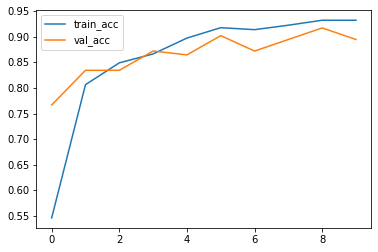

In [86]:
plt.plot(history.history['accuracy'],label='train_acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

In [87]:
result = model.evaluate(test_ds)

1/1 [==============================] - 1s 1s/step - loss: 0.2091 - accuracy: 0.9219


In [94]:
# lets compare prediction for first 10 images in test dataset
count=1
for image,label in train_ds:
  if count ==10:
    break
  print('Test Image',count,end=' ')
  print('orginal label',label[0].argmax(),end=' ')
  X = np.array([image[0]])
  print('predicted label',model.predict(X).argmax())
  count+=1


Test Image 1 orginal label 1 predicted label 1
Test Image 2 orginal label 2 predicted label 2
Test Image 3 orginal label 0 predicted label 0
Test Image 4 orginal label 1 predicted label 1
Test Image 5 orginal label 1 predicted label 1
Test Image 6 orginal label 1 predicted label 1
Test Image 7 orginal label 0 predicted label 0
Test Image 8 orginal label 0 predicted label 0
Test Image 9 orginal label 0 predicted label 0


In [95]:
model.save('./models',save_format='tf')

INFO:tensorflow:Assets written to: ./models/assets


INFO:tensorflow:Assets written to: ./models/assets


In [98]:
!ls -alrt models

total 1888
drwxr-xr-x 1 root root    4096 Nov 10 23:37 ..
drwxr-xr-x 2 root root    4096 Nov 10 23:37 variables
drwxr-xr-x 2 root root    4096 Nov 10 23:37 assets
-rw-r--r-- 1 root root 1904957 Nov 10 23:37 saved_model.pb
-rw-r--r-- 1 root root    6769 Nov 10 23:37 keras_metadata.pb
drwxr-xr-x 4 root root    4096 Nov 10 23:37 .


In [99]:
#testing the model
model_loaded = tensorflow.keras.models.load_model('./models')

In [100]:
model_loaded.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [101]:
from PIL import Image
import numpy as np
from skimage import transform
def process(filename):
  np_img = Image.open(filename)
  np_img = np.array(np_img).astype('float32')
  np_img = transform.resize(np_img,(224,224,3))
  np_img = np.expand_dims(np_img,axis=0)
  return np_img



In [102]:
pred_label = model_loaded.predict(process('/content/beans/train/angular_leaf_spot/angular_leaf_spot_train.0.jpg'))

In [103]:
pred_label.argmax()

0

In [104]:
classes

{'angular_leaf_spot': 0, 'bean_rust': 1, 'healthy': 2}

correctly predicted the image as angular_leaf_spot

In [105]:
!zip -r models.zip models/

  adding: models/ (stored 0%)
  adding: models/keras_metadata.pb (deflated 81%)
  adding: models/saved_model.pb (deflated 92%)
  adding: models/variables/ (stored 0%)
  adding: models/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: models/variables/variables.index (deflated 78%)
  adding: models/assets/ (stored 0%)


In [107]:
!ls 

beans  models  models.zip  sample_data	test.zip  train.zip  validation.zip


In [108]:
print(tensorflow.__version__)

2.7.0


In [109]:
from google.colab import files
files.download("/content/models.zip") #download zip files 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>